In [9]:

# coding: utf-8
import csv
import numpy as np
import pandas as pd
import pdb
import os
import pdb
import matplotlib.pyplot as plt


root = '../../'
imputed_list = []
for dirpath,dirnames,filenames in os.walk(root):
    for filename in filenames:
        if filename.endswith('_imputed.csv'):
            imputed_list.append(dirpath + '/' + filename)

total_problems = []
total_answers = []
problem_ID = 0 # make each question to be an ID
problem_set = {} # unique problem type
answer_set = {'CORRECT':1, 'INCORRECT':0}
print ('The num of students is ', len(imputed_list))

for imputed_file in imputed_list:

    student = pd.read_csv(imputed_file, low_memory=False)
    Response_null = pd.isnull(student["Response"])
    student_res = student[['question','Response']][Response_null == False]
    student_res = student_res[student_res['question'] != '_root'][student_res['question'] != 'done'][student_res['question'] != 'nl'][student_res['Response'] != 'HINT']
    problem_IDs = [] # the total problems sequence of each student.
    answers = [] # the total answers sequence of each student

    for ix, row in student_res.iterrows():
        # print (row['Response'],row['question'])
        if not row['question'] in problem_set:
            problem_ID += 1
            problem_set.update({row['question']: problem_ID})
        problem_IDs.append(problem_set[row['question']])
        answers.append(answer_set[row['Response']])
    num_problem = len(problem_IDs)
    print ('num_students',len(imputed_list),'\n num_problem',num_problem,'\n len(problem_IDs) ',len(problem_IDs),'\n len(answers)', len(answers))
    total_problems.append(problem_IDs)
    total_answers.append(answers)
    



The num of students is  17


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


num_students 17 
 num_problem 315 
 len(problem_IDs)  315 
 len(answers) 315
num_students 17 
 num_problem 294 
 len(problem_IDs)  294 
 len(answers) 294
num_students 17 
 num_problem 248 
 len(problem_IDs)  248 
 len(answers) 248
num_students 17 
 num_problem 285 
 len(problem_IDs)  285 
 len(answers) 285
num_students 17 
 num_problem 292 
 len(problem_IDs)  292 
 len(answers) 292
num_students 17 
 num_problem 228 
 len(problem_IDs)  228 
 len(answers) 228
num_students 17 
 num_problem 265 
 len(problem_IDs)  265 
 len(answers) 265
num_students 17 
 num_problem 338 
 len(problem_IDs)  338 
 len(answers) 338
num_students 17 
 num_problem 292 
 len(problem_IDs)  292 
 len(answers) 292
num_students 17 
 num_problem 263 
 len(problem_IDs)  263 
 len(answers) 263
num_students 17 
 num_problem 252 
 len(problem_IDs)  252 
 len(answers) 252
num_students 17 
 num_problem 241 
 len(problem_IDs)  241 
 len(answers) 241
num_students 17 
 num_problem 222 
 len(problem_IDs)  222 
 len(answers) 222

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


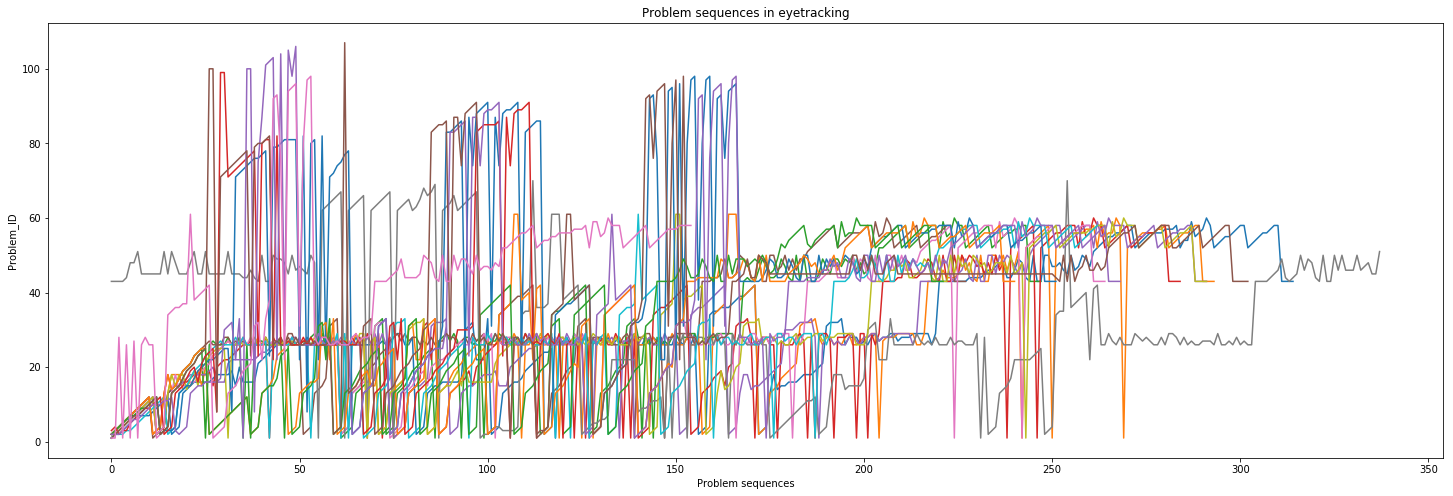

In [16]:
plt.figure(figsize=(25,8))
for student_problem in total_problems:
    plt.plot(student_problem)
plt.xlabel("Problem sequences")
plt.ylabel("Problem_ID")n 
plt.title("Problem sequences in eyetracking")
# plt.ylim(-1.2,1.2)
plt.legend()
plt.show()

